In [113]:
import os
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import cv2
import sys
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [114]:
# Define the base directory where the dataset is located
base_dir = r"C:\Users\aviru\Downloads\archive\chest_xray"  # Adjust the path as needed

# Define the directories for train, validation, and test sets
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Print the full path of the train directory
full_train_dir_path = os.path.abspath(train_dir)
sys.stdout.write(f"Full train directory path: {full_train_dir_path}\n")

# Check the contents of the train directory to ensure it's correct
try:
    print("Contents of the train directory:", os.listdir(train_dir))
except FileNotFoundError as e:
    print("Error:", e)


Full train directory path: C:\Users\aviru\Downloads\archive\chest_xray\train
Contents of the train directory: ['NORMAL', 'PNEUMONIA']


In [115]:
def create_dataframe(data_dir):
    data = []
    for label, folder in enumerate(['NORMAL', 'PNEUMONIA']):
        folder_path = os.path.join(data_dir, folder)
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            data.append((file_path, label))
    return pd.DataFrame(data, columns=['file_path', 'label'])

# Create DataFrames for train, validation, and test sets
train_df = create_dataframe(train_dir)
val_df = create_dataframe(val_dir)
test_df = create_dataframe(test_dir)


In [116]:
train_df

,file_path,label
0,C:\Users\aviru\Downloads\archive\chest_xray\train\NORMAL\IM-0115-0001.jpeg,0
1,C:\Users\aviru\Downloads\archive\chest_xray\train\NORMAL\IM-0117-0001.jpeg,0
2,C:\Users\aviru\Downloads\archive\chest_xray\train\NORMAL\IM-0119-0001.jpeg,0
3,C:\Users\aviru\Downloads\archive\chest_xray\train\NORMAL\IM-0122-0001.jpeg,0
4,C:\Users\aviru\Downloads\archive\chest_xray\train\NORMAL\IM-0125-0001.jpeg,0
...,...,...
5211,C:\Users\aviru\Downloads\archive\chest_xray\train\PNEUMONIA\person99_virus_183.jpeg,1
5212,C:\Users\aviru\Downloads\archive\chest_xray\train\PNEUMONIA\person9_bacteria_38.jpeg,1
5213,C:\Users\aviru\Downloads\archive\chest_xray\train\PNEUMONIA\person9_bacteria_39.jpeg,1
5214,C:\Users\aviru\Downloads\archive\chest_xray\train\PNEUMONIA\person9_bacteria_40.jpeg,1


In [117]:
val_df

,file_path,label
0,C:\Users\aviru\Downloads\archive\chest_xray\val\NORMAL\NORMAL2-IM-1427-0001.jpeg,0
1,C:\Users\aviru\Downloads\archive\chest_xray\val\NORMAL\NORMAL2-IM-1430-0001.jpeg,0
2,C:\Users\aviru\Downloads\archive\chest_xray\val\NORMAL\NORMAL2-IM-1431-0001.jpeg,0
3,C:\Users\aviru\Downloads\archive\chest_xray\val\NORMAL\NORMAL2-IM-1436-0001.jpeg,0
4,C:\Users\aviru\Downloads\archive\chest_xray\val\NORMAL\NORMAL2-IM-1437-0001.jpeg,0
5,C:\Users\aviru\Downloads\archive\chest_xray\val\NORMAL\NORMAL2-IM-1438-0001.jpeg,0
6,C:\Users\aviru\Downloads\archive\chest_xray\val\NORMAL\NORMAL2-IM-1440-0001.jpeg,0
7,C:\Users\aviru\Downloads\archive\chest_xray\val\NORMAL\NORMAL2-IM-1442-0001.jpeg,0
8,C:\Users\aviru\Downloads\archive\chest_xray\val\PNEUMONIA\person1946_bacteria_4874.jpeg,1
9,C:\Users\aviru\Downloads\archive\chest_xray\val\PNEUMONIA\person1946_bacteria_4875.jpeg,1


In [118]:
test_df

,file_path,label
0,C:\Users\aviru\Downloads\archive\chest_xray\test\NORMAL\IM-0001-0001.jpeg,0
1,C:\Users\aviru\Downloads\archive\chest_xray\test\NORMAL\IM-0003-0001.jpeg,0
2,C:\Users\aviru\Downloads\archive\chest_xray\test\NORMAL\IM-0005-0001.jpeg,0
3,C:\Users\aviru\Downloads\archive\chest_xray\test\NORMAL\IM-0006-0001.jpeg,0
4,C:\Users\aviru\Downloads\archive\chest_xray\test\NORMAL\IM-0007-0001.jpeg,0
...,...,...
619,C:\Users\aviru\Downloads\archive\chest_xray\test\PNEUMONIA\person96_bacteria_465.jpeg,1
620,C:\Users\aviru\Downloads\archive\chest_xray\test\PNEUMONIA\person96_bacteria_466.jpeg,1
621,C:\Users\aviru\Downloads\archive\chest_xray\test\PNEUMONIA\person97_bacteria_468.jpeg,1
622,C:\Users\aviru\Downloads\archive\chest_xray\test\PNEUMONIA\person99_bacteria_473.jpeg,1


In [119]:
import pandas as pd

# Set pandas options to display the full path in the DataFrame
pd.set_option('display.max_colwidth', None)

# Print the DataFrame with full file paths
print("Training DataFrame:")
print(train_df.head())

# Check the distribution of labels
print("\nTraining set label distribution:")
print(train_df['label'].value_counts())


Training DataFrame:
                                                                    file_path  \
0  C:\Users\aviru\Downloads\archive\chest_xray\train\NORMAL\IM-0115-0001.jpeg   
1  C:\Users\aviru\Downloads\archive\chest_xray\train\NORMAL\IM-0117-0001.jpeg   
2  C:\Users\aviru\Downloads\archive\chest_xray\train\NORMAL\IM-0119-0001.jpeg   
3  C:\Users\aviru\Downloads\archive\chest_xray\train\NORMAL\IM-0122-0001.jpeg   
4  C:\Users\aviru\Downloads\archive\chest_xray\train\NORMAL\IM-0125-0001.jpeg   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  

Training set label distribution:
label
1    3875
0    1341
Name: count, dtype: int64


### Shuffling the dataframe

In [120]:
# Shuffle the DataFrame
train_df_shuffled = train_df.sample(frac=1).reset_index(drop=True)

# Display the shuffled DataFrame
print("Shuffled Training DataFrame:")
print(train_df_shuffled.head())


Shuffled Training DataFrame:
                                                                                   file_path  \
0   C:\Users\aviru\Downloads\archive\chest_xray\train\PNEUMONIA\person719_bacteria_2621.jpeg   
1      C:\Users\aviru\Downloads\archive\chest_xray\train\PNEUMONIA\person940_virus_1602.jpeg   
2   C:\Users\aviru\Downloads\archive\chest_xray\train\PNEUMONIA\person281_bacteria_1324.jpeg   
3                 C:\Users\aviru\Downloads\archive\chest_xray\train\NORMAL\IM-0177-0001.jpeg   
4  C:\Users\aviru\Downloads\archive\chest_xray\train\PNEUMONIA\person1308_bacteria_3285.jpeg   

   label  
0      1  
1      1  
2      1  
3      0  
4      1  


### Making the Data balanced

In [121]:
import pandas as pd
from sklearn.utils import resample

# Separate the classes
normal_data = train_df[train_df['label'] == 0]  # 0: Normal
pneumonia_data = train_df[train_df['label'] == 1]  # 1: Pneumonia

# Step 1: Take a subset of 2000 samples from the Normal class
normal_subset = resample(
    normal_data,
    replace=True,  # replacement
    n_samples=2000,  # 1500 samples
    random_state=42  # For reproducibility
)

# Step 2: Upsample the Pneumonia class to 1500 samples
pneumonia_upsampled = resample(
    pneumonia_data,
    replace=True,  # Allow duplicates
    n_samples=2000,  # 1500 samples
    random_state=42
)

# Step 3: Combine the subset Normal class and upsampled Pneumonia class
balanced_data = pd.concat([normal_subset, pneumonia_upsampled])

# Shuffle the combined dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 4: Replace train_df with the balanced data
train_df = balanced_data.copy()  # Overwrite train_df

# Step 5: Verify the class distribution in the updated train_df
print(train_df['label'].value_counts())


label
0    2000
1    2000
Name: count, dtype: int64


### Visualize Sample Images 

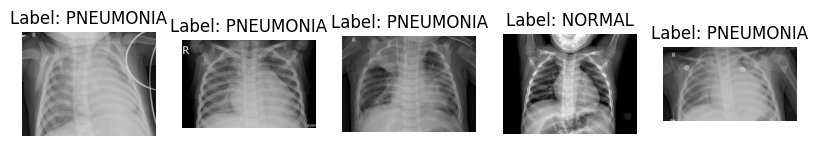

In [122]:
def display_samples(dataframe, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        img_path = train_df_shuffled.iloc[i]['file_path']
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.imshow(img)
        plt.title("Label: " + ("NORMAL" if train_df_shuffled.iloc[i]['label'] == 0 else "PNEUMONIA"))
        plt.axis('off')
    plt.show()

# Display sample images from the training set
display_samples(train_df_shuffled)


In [123]:
train_df

,file_path,label
0,C:\Users\aviru\Downloads\archive\chest_xray\train\NORMAL\IM-0750-0001.jpeg,0
1,C:\Users\aviru\Downloads\archive\chest_xray\train\PNEUMONIA\person1395_bacteria_3544.jpeg,1
2,C:\Users\aviru\Downloads\archive\chest_xray\train\NORMAL\NORMAL2-IM-0561-0001.jpeg,0
3,C:\Users\aviru\Downloads\archive\chest_xray\train\PNEUMONIA\person1203_bacteria_3155.jpeg,1
4,C:\Users\aviru\Downloads\archive\chest_xray\train\PNEUMONIA\person620_bacteria_2492.jpeg,1
...,...,...
3995,C:\Users\aviru\Downloads\archive\chest_xray\train\NORMAL\NORMAL2-IM-1163-0001.jpeg,0
3996,C:\Users\aviru\Downloads\archive\chest_xray\train\NORMAL\NORMAL2-IM-0905-0001.jpeg,0
3997,C:\Users\aviru\Downloads\archive\chest_xray\train\NORMAL\IM-0435-0001-0001.jpeg,0
3998,C:\Users\aviru\Downloads\archive\chest_xray\train\PNEUMONIA\person7_bacteria_28.jpeg,1


### Label Distribution Analysis


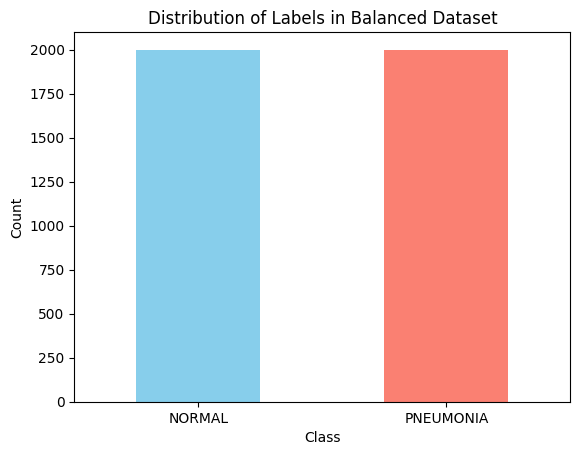

In [124]:
# Plot the distribution of labels in the balanced dataset
balanced_data['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Labels in Balanced Dataset")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["NORMAL", "PNEUMONIA"], rotation=0)
plt.show()


###  Image Dimension Analysis

In [125]:
import cv2

dimensions = []
for img_path in train_df['file_path']:
    img = cv2.imread(img_path)
    if img is not None:
        dimensions.append(img.shape[:2])  # height, width

# Convert dimensions to a DataFrame for analysis
dim_df = pd.DataFrame(dimensions, columns=['height', 'width'])
print(dim_df.describe())


            height       width
count  4000.000000  4000.00000
mean   1097.049750  1428.56675
std     414.985647   378.07039
min     151.000000   415.00000
25%     760.000000  1136.00000
50%    1071.000000  1422.00000
75%    1349.250000  1680.00000
max    2663.000000  2890.00000


### Visual Sample Inspection


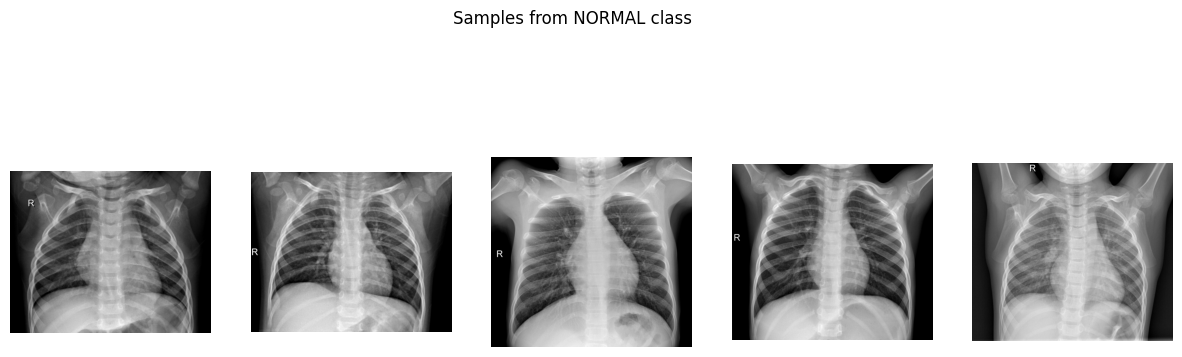

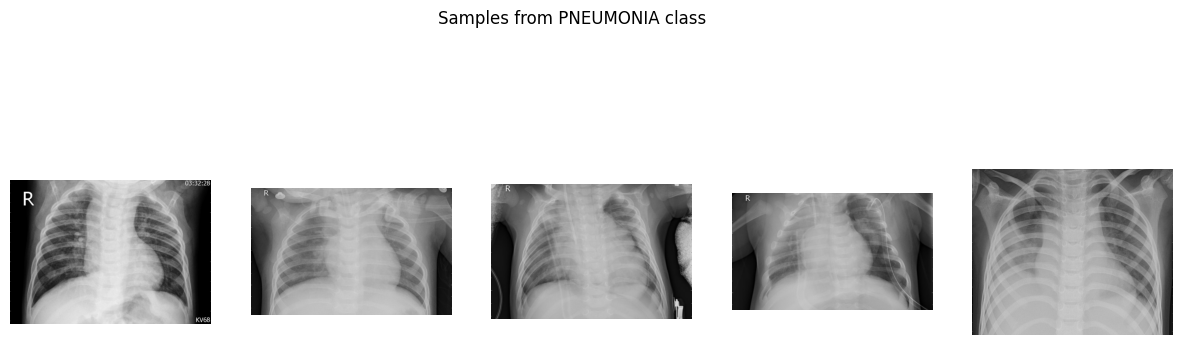

In [126]:
def display_samples(dataframe, label, num_samples=5):
    plt.figure(figsize=(15, 5))
    sample_df = dataframe[dataframe['label'] == label].sample(num_samples, random_state=42)
    for i, img_path in enumerate(sample_df['file_path']):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle("Samples from " + ("NORMAL" if label == 0 else "PNEUMONIA") + " class")
    plt.show()

display_samples(train_df, label=0)  # NORMAL samples
display_samples(train_df, label=1)  # PNEUMONIA samples


### Brightness and Contrast Analysis


C:\Users\aviru\AppData\Local\Temp\ipykernel_14756\1776947973.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([brightness_values['NORMAL'], brightness_values['PNEUMONIA']], labels=['NORMAL', 'PNEUMONIA'])


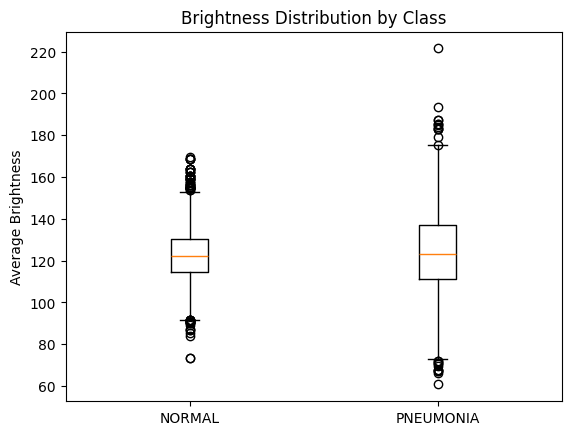

In [127]:
import numpy as np

brightness_values = {'NORMAL': [], 'PNEUMONIA': []}

for idx, row in train_df.iterrows():
    img = cv2.imread(row['file_path'], cv2.IMREAD_GRAYSCALE)
    if img is not None:
        brightness = np.mean(img)
        label = "NORMAL" if row['label'] == 0 else "PNEUMONIA"
        brightness_values[label].append(brightness)

# Plot brightness values
plt.boxplot([brightness_values['NORMAL'], brightness_values['PNEUMONIA']], labels=['NORMAL', 'PNEUMONIA'])
plt.title("Brightness Distribution by Class")
plt.ylabel("Average Brightness")
plt.show()


### Function to load and preprocess images from a DataFrame

In [128]:
def preprocess_images(df):
    images = []
    IMG_SIZE = 64   # Resize images to a consistent size (e.g., 64x64)
    labels = df['label'].values
    for img_path in df['file_path']:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to 64x64
            img = img.flatten() / 255.0  # Flatten and normalize
            images.append(img)
    return np.array(images), labels


### Prepare data for training, validation, and test sets


In [129]:
X_train, y_train = preprocess_images(train_df)
X_val, y_val = preprocess_images(val_df)
X_test, y_test = preprocess_images(test_df)

In [130]:
print("Data preparation complete.")
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Data preparation complete.
Training set shape: (4000, 4096)
Validation set shape: (16, 4096)
Test set shape: (624, 4096)


###  Linear Kernel

In [131]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the SVM model with a linear kernel
linear_svm = SVC(kernel='linear')

# Define the parameter grid for C
param_grid_linear = {
    'C': [0.1, 1, 10, 100]  # Regularization parameter
}

# Use GridSearchCV to search over the parameter grid on the validation set
grid_search_linear = GridSearchCV(linear_svm, param_grid_linear, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_linear.fit(X_train, y_train)

# Retrieve the best model and its parameters
best_linear_svm = grid_search_linear.best_estimator_
print("\nBest parameters for Linear Kernel:", grid_search_linear.best_params_)
print("\nBest cross-validation score for Linear Kernel:", grid_search_linear.best_score_)

# Evaluate the best model on the validation set
y_val_pred_linear = best_linear_svm.predict(X_val)
val_accuracy_linear = accuracy_score(y_val, y_val_pred_linear)
print("\nValidation Accuracy with Best Linear SVM Model:", val_accuracy_linear)
print("\nValidation Set Classification Report for Linear Kernel:\n", classification_report(y_val, y_val_pred_linear))


Fitting 3 folds for each of 4 candidates, totalling 12 fits

Best parameters for Linear Kernel: {'C': 1}

Best cross-validation score for Linear Kernel: 0.9737499967195697

Validation Accuracy with Best Linear SVM Model: 0.9375

Validation Set Classification Report for Linear Kernel:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.89      1.00      0.94         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16



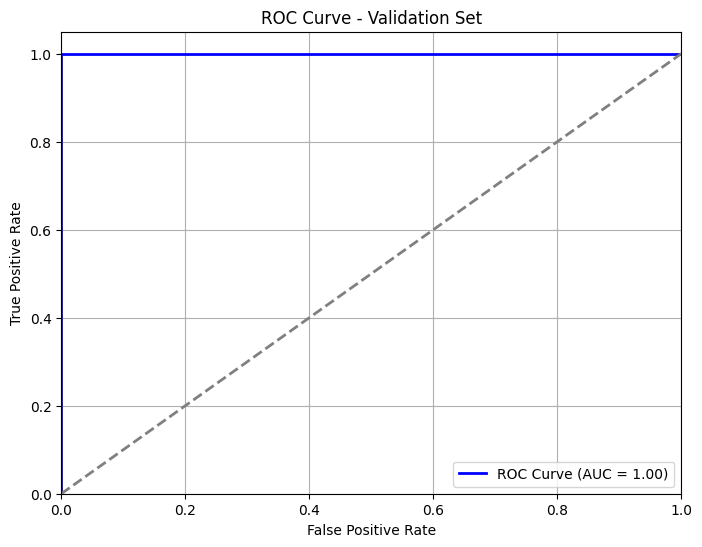

Validation AUC: 1.00


In [132]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the decision scores for the validation set
y_val_scores_linear = best_linear_svm.decision_function(X_val)

# Compute the ROC curve and AUC for the validation set
fpr, tpr, thresholds = roc_curve(y_val, y_val_scores_linear)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print AUC value
print(f"Validation AUC: {roc_auc:.2f}")


In [133]:
# Evaluate the best model on the testing set
y_test_pred_linear = best_linear_svm.predict(X_test)
testing_accuracy_linear = accuracy_score(y_test, y_test_pred_linear)
print("\ntesting Accuracy with Best Linear SVM Model:", testing_accuracy_linear)
print("\ntesting Set Classification Report for Linear Kernel:\n", classification_report(y_test, y_test_pred_linear))


testing Accuracy with Best Linear SVM Model: 0.7596153846153846

testing Set Classification Report for Linear Kernel:
               precision    recall  f1-score   support

           0       0.91      0.40      0.55       234
           1       0.73      0.98      0.84       390

    accuracy                           0.76       624
   macro avg       0.82      0.69      0.69       624
weighted avg       0.80      0.76      0.73       624



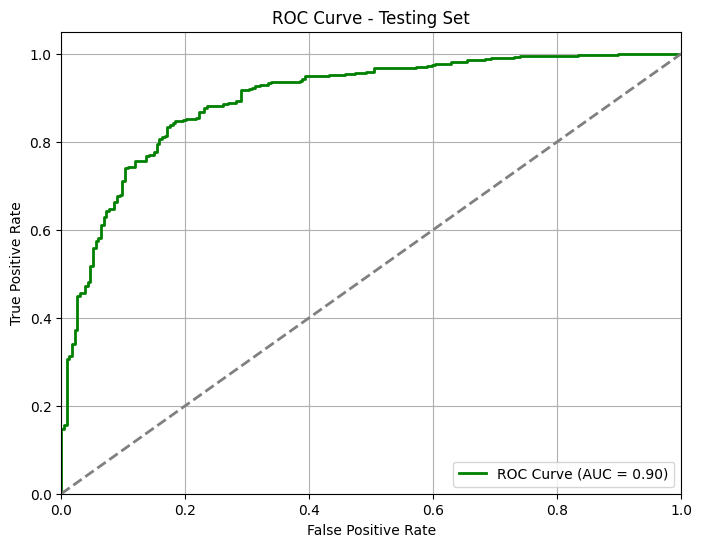

Testing AUC: 0.90


In [134]:
# Get the decision scores for the testing set
y_test_scores_linear = best_linear_svm.decision_function(X_test)

# Compute the ROC curve and AUC for the testing set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_scores_linear)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot the ROC curve for the testing set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Testing Set')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print AUC value for testing
print(f"Testing AUC: {roc_auc_test:.2f}")


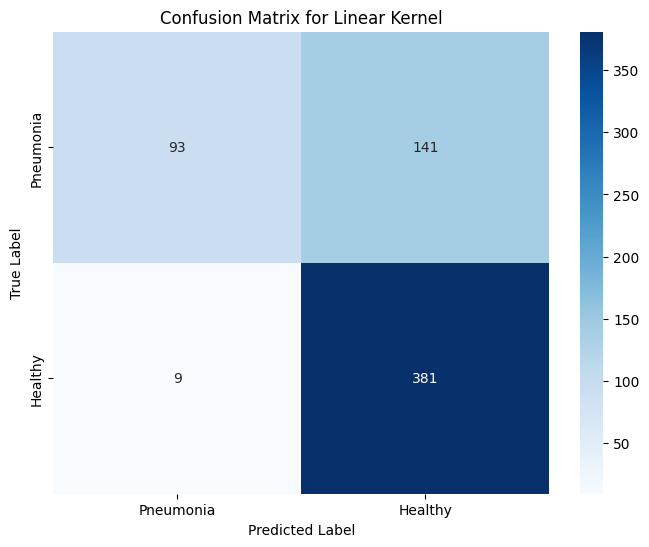

In [135]:
# Generate the confusion matrix
cm_linear = confusion_matrix(y_test, y_test_pred_linear)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt="d", cmap="Blues", xticklabels=["Pneumonia", "Healthy"], yticklabels=["Pneumonia", "Healthy"])
plt.title("Confusion Matrix for Linear Kernel")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Polynomial Kernel

In [136]:
# Define the SVM model with a polynomial kernel
poly_svm = SVC(kernel='poly')

# Define the parameter grid for C and degree
param_grid_poly = {
    'C': [0.1, 1, 10, 100],      # Regularization parameter
    'degree': [2, 3, 4],         # Degrees for polynomial kernel
    'gamma': ['scale', 'auto']   # Kernel coefficient
}

# Use GridSearchCV to search over the parameter grid on the validation set
grid_search_poly = GridSearchCV(poly_svm, param_grid_poly, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_poly.fit(X_train, y_train)

# Retrieve the best model and its parameters
best_poly_svm = grid_search_poly.best_estimator_
print("\nBest parameters for Polynomial Kernel:", grid_search_poly.best_params_)
print("\nBest cross-validation score for Polynomial Kernel:", grid_search_poly.best_score_)

# Evaluate the best model on the validation set
y_val_pred_poly = best_poly_svm.predict(X_val)
val_accuracy_poly = accuracy_score(y_val, y_val_pred_poly)
print("\nValidation Accuracy with Best Polynomial SVM Model:", val_accuracy_poly)
print("\nValidation Set Classification Report for Polynomial Kernel:\n", classification_report(y_val, y_val_pred_poly))


Fitting 3 folds for each of 24 candidates, totalling 72 fits

Best parameters for Polynomial Kernel: {'C': 1, 'degree': 3, 'gamma': 'scale'}

Best cross-validation score for Polynomial Kernel: 0.9762519340479797

Validation Accuracy with Best Polynomial SVM Model: 0.875

Validation Set Classification Report for Polynomial Kernel:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.80      1.00      0.89         8

    accuracy                           0.88        16
   macro avg       0.90      0.88      0.87        16
weighted avg       0.90      0.88      0.87        16



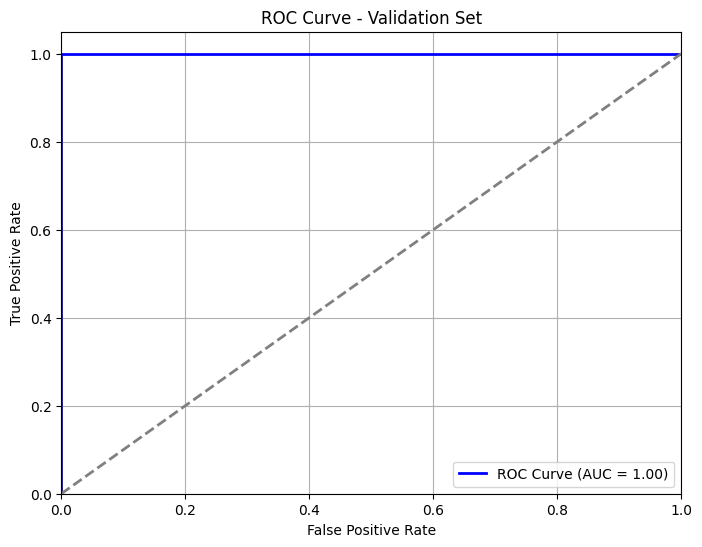

Validation AUC: 1.00


In [137]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the decision scores for the validation set
y_val_scores_poly = best_poly_svm.decision_function(X_val)

# Compute the ROC curve and AUC for the validation set
fpr, tpr, thresholds = roc_curve(y_val, y_val_scores_poly)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print AUC value
print(f"Validation AUC: {roc_auc:.2f}")


In [138]:
# Evaluate the best model on the testing set
y_test_pred_poly = best_poly_svm.predict(X_test)
val_accuracy_poly = accuracy_score(y_test, y_test_pred_poly)
print("\ntesting Accuracy with Best Polynomial SVM Model:", val_accuracy_poly)
print("\ntesting Set Classification Report for ploynomial Kernel:\n", classification_report(y_test, y_test_pred_poly))


testing Accuracy with Best Polynomial SVM Model: 0.7596153846153846

testing Set Classification Report for ploynomial Kernel:
               precision    recall  f1-score   support

           0       0.90      0.41      0.56       234
           1       0.73      0.97      0.83       390

    accuracy                           0.76       624
   macro avg       0.81      0.69      0.70       624
weighted avg       0.79      0.76      0.73       624



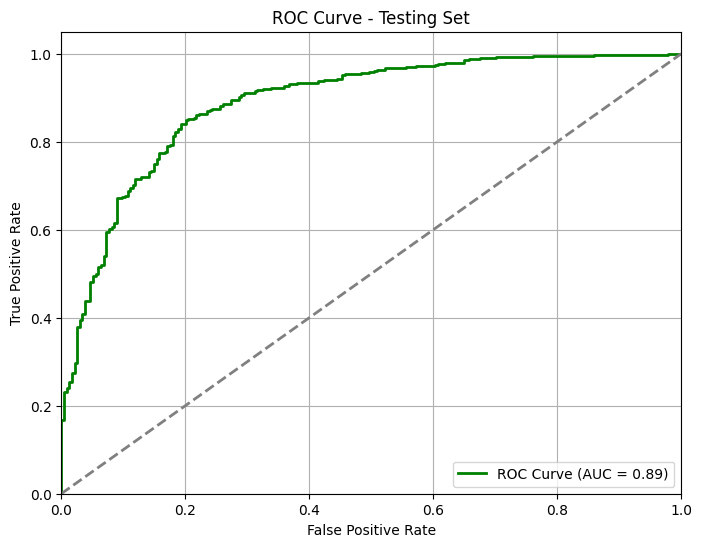

Testing AUC: 0.89


In [139]:
# Get the decision scores for the testing set
y_test_scores_ploy = best_poly_svm.decision_function(X_test)

# Compute the ROC curve and AUC for the testing set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_scores_ploy)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot the ROC curve for the testing set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Testing Set')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print AUC value for testing
print(f"Testing AUC: {roc_auc_test:.2f}")


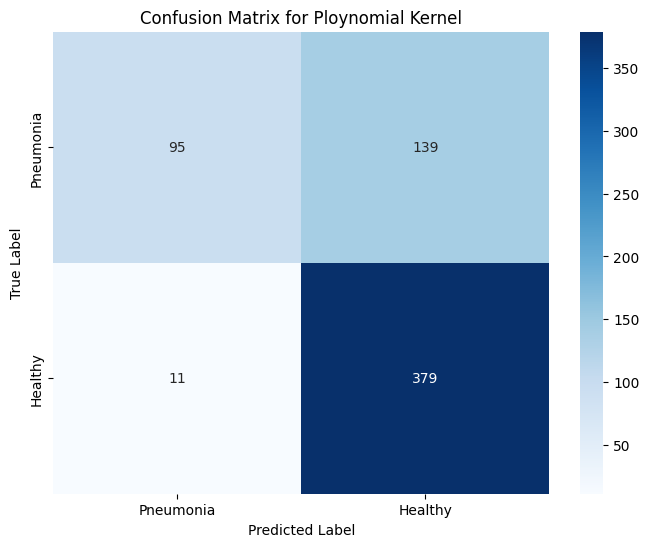

In [140]:
# Generate the confusion matrix
cm_poly = confusion_matrix(y_test, y_test_pred_poly)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_poly, annot=True, fmt="d", cmap="Blues",  xticklabels=["Pneumonia", "Healthy"], yticklabels=["Pneumonia", "Healthy"])
plt.title("Confusion Matrix for Ploynomial Kernel")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### RBF Kernel

In [141]:
# Define the SVM model with an RBF kernel
rbf_svm = SVC(kernel='rbf')

# Define the parameter grid for C and gamma
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],       # Regularization parameter
    'gamma': ['scale', 'auto']    # Kernel coefficient
}

# Use GridSearchCV to search over the parameter grid on the validation set
grid_search_rbf = GridSearchCV(rbf_svm, param_grid_rbf, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_rbf.fit(X_train, y_train)

# Retrieve the best model and its parameters
best_rbf_svm = grid_search_rbf.best_estimator_
print("\nBest parameters for RBF Kernel:", grid_search_rbf.best_params_)
print("\nBest cross-validation score for RBF Kernel:", grid_search_rbf.best_score_)

# Evaluate the best model on the validation set
y_val_pred_rbf = best_rbf_svm.predict(X_val)
val_accuracy_rbf = accuracy_score(y_val, y_val_pred_rbf)
print("\nValidation Accuracy with Best RBF SVM Model:", val_accuracy_rbf)
print("\nValidation Set Classification Report for RBF Kernel:\n", classification_report(y_val, y_val_pred_rbf))


Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best parameters for RBF Kernel: {'C': 10, 'gamma': 'scale'}

Best cross-validation score for RBF Kernel: 0.9797503723757027

Validation Accuracy with Best RBF SVM Model: 0.875

Validation Set Classification Report for RBF Kernel:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.80      1.00      0.89         8

    accuracy                           0.88        16
   macro avg       0.90      0.88      0.87        16
weighted avg       0.90      0.88      0.87        16



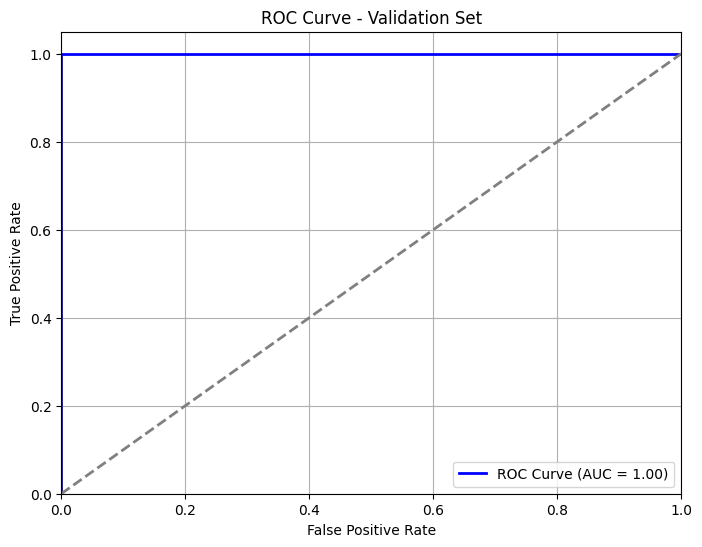

Validation AUC: 1.00


In [142]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the decision scores for the validation set
y_val_scores_rbf = best_rbf_svm.decision_function(X_val)

# Compute the ROC curve and AUC for the validation set
fpr, tpr, thresholds = roc_curve(y_val, y_val_scores_rbf)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print AUC value
print(f"Validation AUC: {roc_auc:.2f}")


In [143]:
# Evaluate the best model on the testing set
y_test_pred_rbf = best_rbf_svm.predict(X_test)
Test_accuracy_rbf = accuracy_score(y_test, y_test_pred_rbf)
print("\nTesting Accuracy with Best Linear SVM Model:", Test_accuracy_rbf)
print("\nTesting Set Classification Report for rbf Kernel:\n", classification_report(y_test, y_test_pred_rbf))


Testing Accuracy with Best Linear SVM Model: 0.7724358974358975

Testing Set Classification Report for rbf Kernel:
               precision    recall  f1-score   support

           0       0.93      0.42      0.58       234
           1       0.74      0.98      0.84       390

    accuracy                           0.77       624
   macro avg       0.84      0.70      0.71       624
weighted avg       0.81      0.77      0.75       624



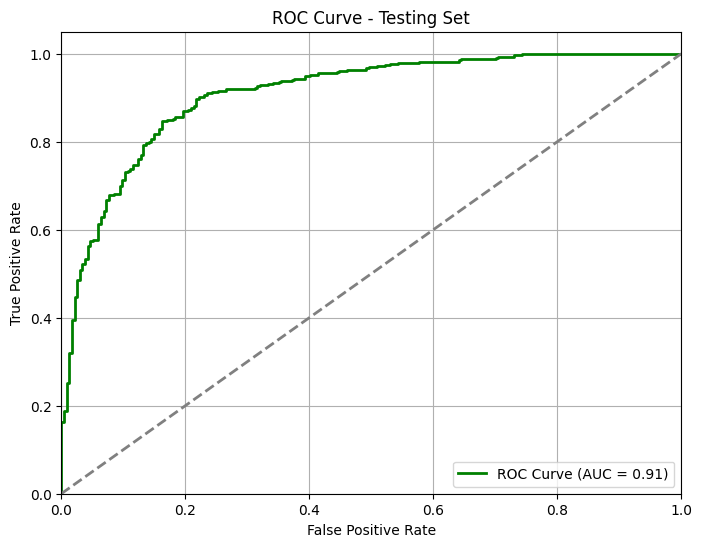

Testing AUC: 0.91


In [144]:
# Get the decision scores for the testing set
y_test_scores_rbf = best_rbf_svm.decision_function(X_test)

# Compute the ROC curve and AUC for the testing set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_scores_rbf)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot the ROC curve for the testing set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Testing Set')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print AUC value for testing
print(f"Testing AUC: {roc_auc_test:.2f}")


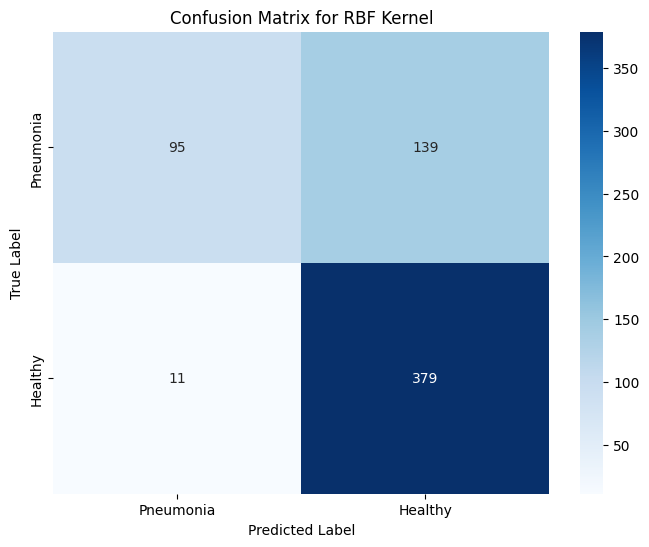

In [145]:
# Generate the confusion matrix
cm_rbf = confusion_matrix(y_test, y_test_pred_poly)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Blues", xticklabels=["Pneumonia", "Healthy"], yticklabels=["Pneumonia", "Healthy"])
plt.title("Confusion Matrix for RBF Kernel")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Decission Tree

In [146]:
# Defining the Decision tree classifier
Decision_tree_clsf = DecisionTreeClassifier()
Decision_tree_clsf.fit(X_train,y_train)
# Evaluate the best model on the validation set
y_val_pred_Decission_tree = Decision_tree_clsf.predict(X_val)
validation_accuracy_DST = accuracy_score(y_val, y_val_pred_Decission_tree)
print("\nValidation Accuracy with Decission Tree :", validation_accuracy_DST)
print("\nValidation Set Classification Report for Decission Tree:\n", classification_report(y_val, y_val_pred_Decission_tree))



Validation Accuracy with Decission Tree : 0.75

Validation Set Classification Report for Decission Tree:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.67      1.00      0.80         8

    accuracy                           0.75        16
   macro avg       0.83      0.75      0.73        16
weighted avg       0.83      0.75      0.73        16



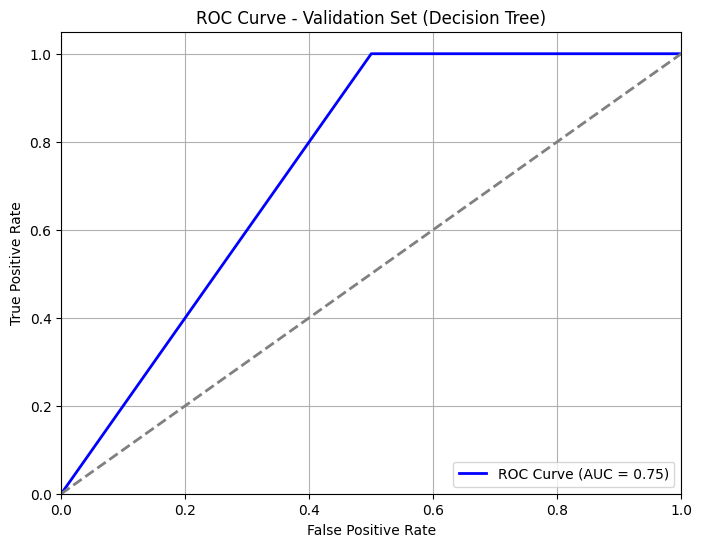

Validation AUC for Decision Tree: 0.75


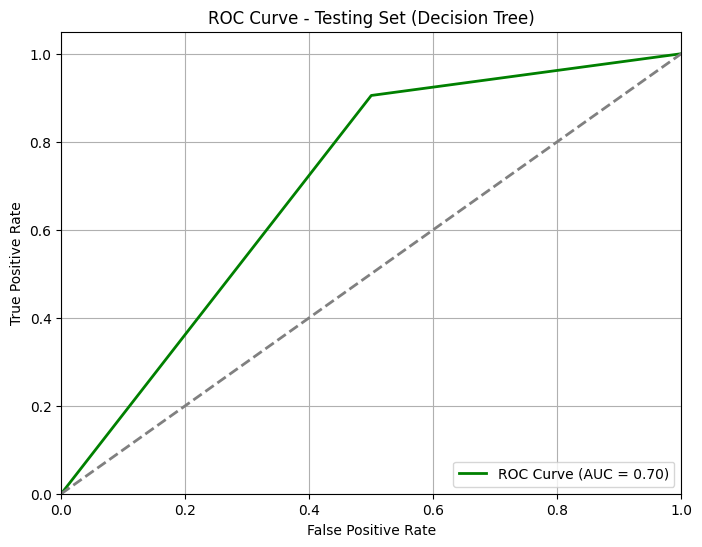

Testing AUC for Decision Tree: 0.70


In [147]:
# Predict probabilities for the validation set
y_val_probs_tree = Decision_tree_clsf.predict_proba(X_val)[:, 1]  # Probabilities for the positive class

# Compute the ROC curve and AUC for the validation set
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_val, y_val_probs_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Plot the ROC curve for the validation set
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set (Decision Tree)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print AUC value
print(f"Validation AUC for Decision Tree: {roc_auc_tree:.2f}")

# Evaluate on the testing set
y_test_probs_tree = Decision_tree_clsf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr_test_tree, tpr_test_tree, thresholds_test_tree = roc_curve(y_test, y_test_probs_tree)
roc_auc_test_tree = auc(fpr_test_tree, tpr_test_tree)

# Plot the ROC curve for the testing set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_tree, tpr_test_tree, color='green', lw=2, label=f'ROC Curve (AUC = {roc_auc_test_tree:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Testing Set (Decision Tree)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print AUC value for testing
print(f"Testing AUC for Decision Tree: {roc_auc_test_tree:.2f}")

In [148]:
# Evaluate the best model on the testing set
y_test_pred_Decission_tree = Decision_tree_clsf.predict(X_test)
testing_accuracy_DST = accuracy_score(y_test, y_test_pred_Decission_tree)
print("\nTesting Accuracy with Decission Tree :", testing_accuracy_DST)
print("\nTesting Set Classification Report for Decission Tree:\n", classification_report(y_test, y_test_pred_Decission_tree))



Testing Accuracy with Decission Tree : 0.7532051282051282

Testing Set Classification Report for Decission Tree:
               precision    recall  f1-score   support

           0       0.76      0.50      0.60       234
           1       0.75      0.91      0.82       390

    accuracy                           0.75       624
   macro avg       0.76      0.70      0.71       624
weighted avg       0.75      0.75      0.74       624



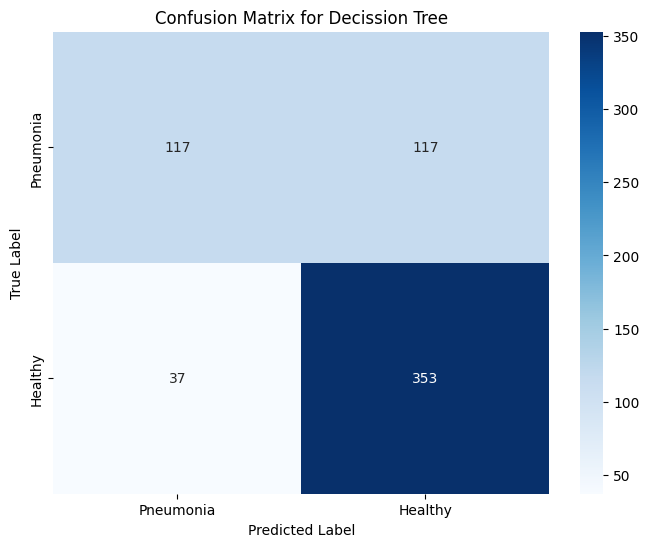

In [149]:
# Generate the confusion matrix
cm_DST = confusion_matrix(y_test, y_test_pred_Decission_tree)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_DST, annot=True, fmt="d", cmap="Blues", xticklabels=["Pneumonia", "Healthy"], yticklabels=["Pneumonia", "Healthy"])
plt.title("Confusion Matrix for Decission Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Visualizing the Decission tree

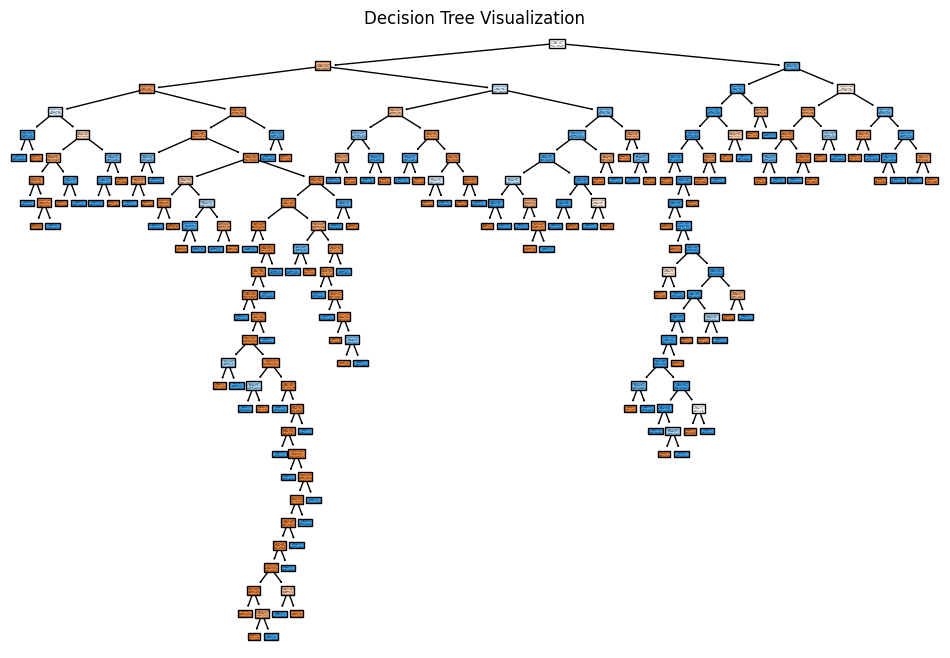

In [150]:
# Visualizing the Decission tree
plt.figure(figsize=(12, 8))
plot_tree(Decision_tree_clsf, class_names=["Healthy", "Pneumonia"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

### Random Forest technique

In [151]:
# Random Forest Classifier 
RF_model = RandomForestClassifier(max_depth= 10 ,n_estimators=200,random_state=42)
#Training the Data
RF_model.fit(X_train,y_train)
# Evaluate the best model on the validation set
y_val_pred_rf = RF_model.predict(X_val)
validation_accuracy_RF = accuracy_score(y_val, y_val_pred_rf)
print("\nValidation Accuracy with RandomForest :", validation_accuracy_RF)
print("\nValidation Set Classification Report for RandomForest:\n", classification_report(y_val, y_val_pred_rf))



Validation Accuracy with RandomForest : 0.75

Validation Set Classification Report for RandomForest:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.67      1.00      0.80         8

    accuracy                           0.75        16
   macro avg       0.83      0.75      0.73        16
weighted avg       0.83      0.75      0.73        16



In [152]:
# Evaluate the best model on the Test set
y_test_pred_rf = RF_model.predict(X_test)
Test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print("\nTest Accuracy with RandomForest :", Test_accuracy_rf)
print("\nTest Set Classification Report for RandomForest:\n", classification_report(y_test, y_test_pred_rf))



Test Accuracy with RandomForest : 0.8573717948717948

Test Set Classification Report for RandomForest:
               precision    recall  f1-score   support

           0       0.92      0.68      0.78       234
           1       0.83      0.97      0.89       390

    accuracy                           0.86       624
   macro avg       0.88      0.82      0.84       624
weighted avg       0.87      0.86      0.85       624



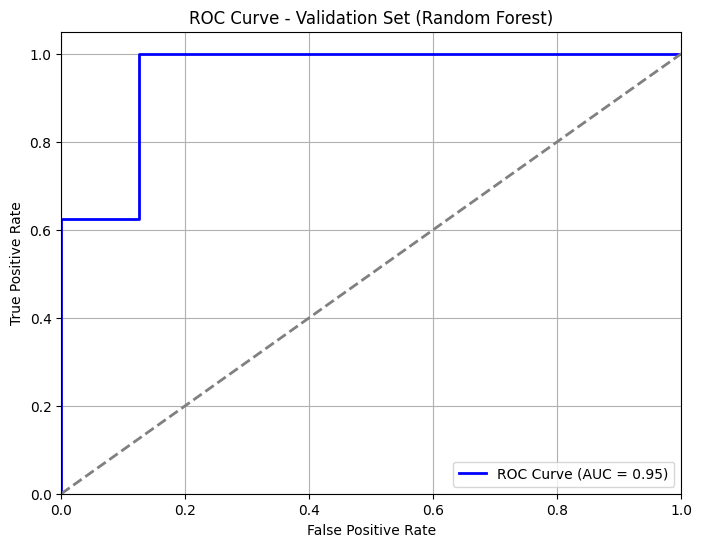

Validation AUC for Random Forest: 0.95


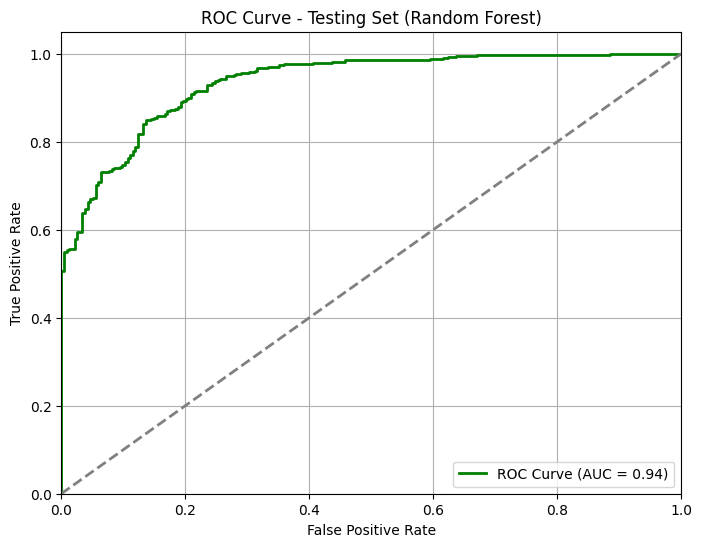

Testing AUC for Random Forest: 0.94


In [153]:
# Predict probabilities for the validation set
y_val_probs_rf = RF_model.predict_proba(X_val)[:, 1]  # Probabilities for the positive class

# Compute the ROC curve and AUC for the validation set
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_val, y_val_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve for the validation set
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set (Random Forest)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print AUC value for validation set
print(f"Validation AUC for Random Forest: {roc_auc_rf:.2f}")

# Evaluate on the testing set
y_test_probs_rf = RF_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr_test_rf, tpr_test_rf, thresholds_test_rf = roc_curve(y_test, y_test_probs_rf)
roc_auc_test_rf = auc(fpr_test_rf, tpr_test_rf)

# Plot the ROC curve for the testing set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_rf, tpr_test_rf, color='green', lw=2, label=f'ROC Curve (AUC = {roc_auc_test_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Testing Set (Random Forest)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print AUC value for testing set
print(f"Testing AUC for Random Forest: {roc_auc_test_rf:.2f}")

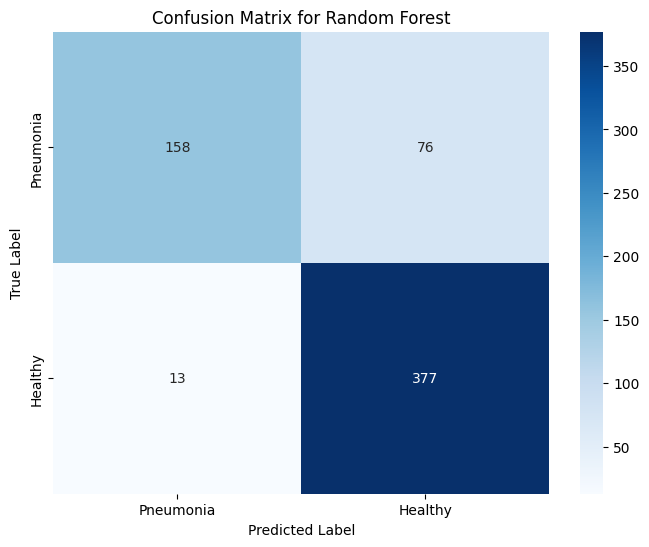

In [154]:
# Generate the confusion matrix
cm_rbf = confusion_matrix(y_test, y_test_pred_rf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Blues", xticklabels=["Pneumonia", "Healthy"], yticklabels=["Pneumonia", "Healthy"])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Bagging 

In [167]:
# Base model: Decision Tree
base_estm = DecisionTreeClassifier(max_depth=10, random_state=42)

# Bagging model
bagging_model = BaggingClassifier(
    estimator=base_estm, 
    n_estimators=50,  # Number of decision trees
    max_samples=0.8,  # Fraction of samples for each tree
    max_features=1.0,  # Fraction of features for each tree
    random_state=42
)
 # Fit the model
bagging_model.fit(X_train, y_train)

# Evaluate
y_val_pred_Bg = bagging_model.predict(X_val)
validation_accuracy_DT = accuracy_score(y_val, y_val_pred_Bg)

print("\nValidation Accuracy with Bagging :", validation_accuracy_DT)
print("\nValidation Set Classification Report for RandomForest:\n", classification_report(y_val, y_val_pred_Bg))


Validation Accuracy with Bagging : 0.6875

Validation Set Classification Report for RandomForest:
               precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.62      1.00      0.76         8

    accuracy                           0.69        16
   macro avg       0.81      0.69      0.65        16
weighted avg       0.81      0.69      0.65        16



In [168]:
# Evaluate
y_test_pred_Bg = bagging_model.predict(X_test)
Test_accuracy_BG = accuracy_score(y_test, y_test_pred_Bg)

print("\Testing Accuracy with Bagging :", Test_accuracy_BG)
print("\Testing Set Classification Report for RandomForest:\n", classification_report(y_test, y_test_pred_Bg))

\Testing Accuracy with Bagging : 0.8141025641025641
\Testing Set Classification Report for RandomForest:
               precision    recall  f1-score   support

           0       0.87      0.59      0.71       234
           1       0.80      0.95      0.86       390

    accuracy                           0.81       624
   macro avg       0.83      0.77      0.78       624
weighted avg       0.82      0.81      0.80       624



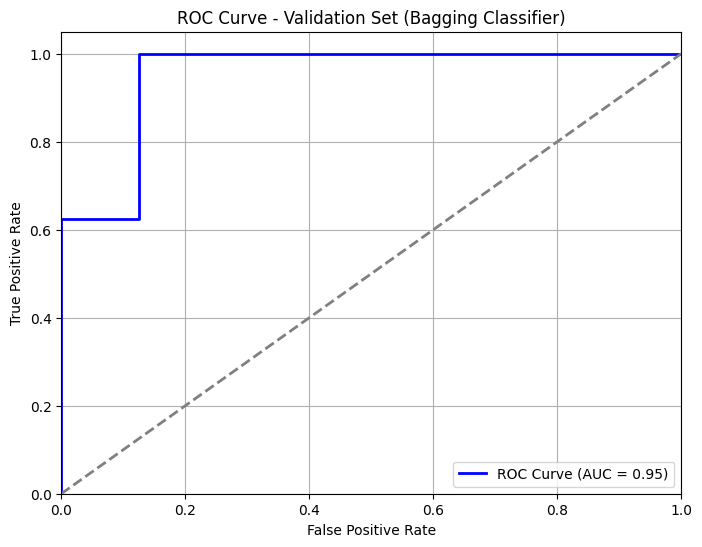

Validation AUC for Bagging Classifier: 0.95


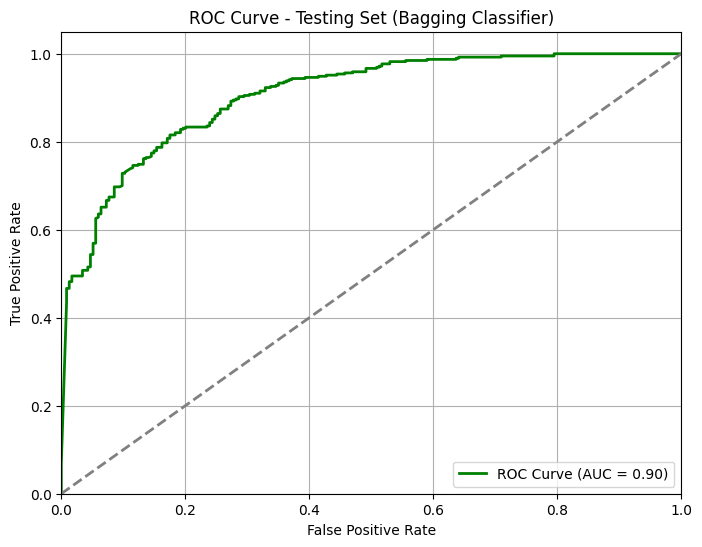

Testing AUC for Bagging Classifier: 0.90


In [157]:
# Predict probabilities for the validation set
y_val_probs_bagging = bagging_model.predict_proba(X_val)[:, 1]  # Probabilities for the positive class

# Compute the ROC curve and AUC for the validation set
fpr_bagging, tpr_bagging, thresholds_bagging = roc_curve(y_val, y_val_probs_bagging)
roc_auc_bagging = auc(fpr_bagging, tpr_bagging)

# Plot the ROC curve for the validation set
plt.figure(figsize=(8, 6))
plt.plot(fpr_bagging, tpr_bagging, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_bagging:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set (Bagging Classifier)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print AUC value for validation set
print(f"Validation AUC for Bagging Classifier: {roc_auc_bagging:.2f}")

# Evaluate on the testing set
y_test_probs_bagging = bagging_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr_test_bagging, tpr_test_bagging, thresholds_test_bagging = roc_curve(y_test, y_test_probs_bagging)
roc_auc_test_bagging = auc(fpr_test_bagging, tpr_test_bagging)

# Plot the ROC curve for the testing set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_bagging, tpr_test_bagging, color='green', lw=2, label=f'ROC Curve (AUC = {roc_auc_test_bagging:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Testing Set (Bagging Classifier)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print AUC value for testing set
print(f"Testing AUC for Bagging Classifier: {roc_auc_test_bagging:.2f}")

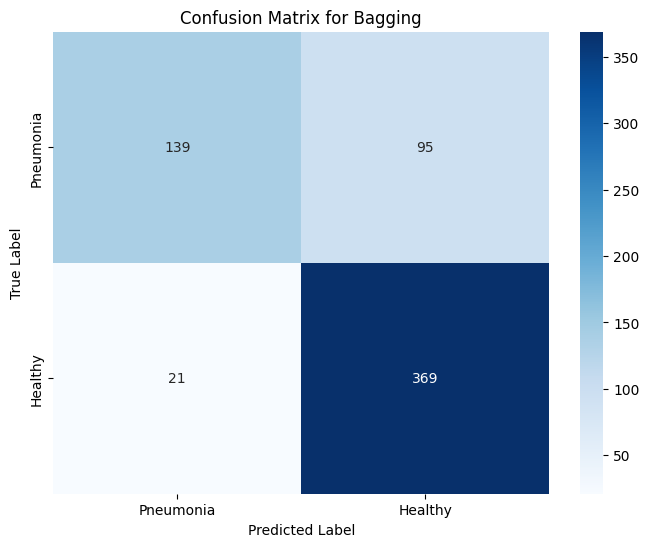

In [158]:
# Generate the confusion matrix
cm_bg = confusion_matrix(y_test, y_test_pred_Bg)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bg, annot=True, fmt="d", cmap="Blues", xticklabels=["Pneumonia", "Healthy"], yticklabels=["Pneumonia", "Healthy"])
plt.title("Confusion Matrix for Bagging")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Votting Algorithm

In [159]:
from sklearn.ensemble import VotingClassifier
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)  # Decision Tree
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=10, random_state=42), 
    n_estimators=50, 
    random_state=42) 
# Bagging
rf_model = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)  # Random Forest

# Define SVMs with different kernels
svc_linear = SVC(kernel="linear", probability=True, random_state=42)     # Linear Kernel
svc_poly = SVC(kernel="poly", degree=3, probability=True, random_state=42)  # Polynomial Kernel
svc_rbf = SVC(kernel="rbf", probability=True, random_state=42)          # RBF Kernel

# Step 4: Define the Voting Classifier
voting_model = VotingClassifier(
    estimators=[
        ('DecisionTree', dt_model),
        ('Bagging', bagging_model),
        ('RandomForest', rf_model),
        ('SVC_Linear', svc_linear),
        ('SVC_Poly', svc_poly),
        ('SVC_RBF', svc_rbf)
    ],
    voting='soft'  # Use 'soft' for probabilities; 'hard' for majority vote
)

# Step 5: Fit the Voting Classifier
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('DecisionTree',
                              DecisionTreeClassifier(max_depth=10,
                                                     random_state=42)),
                             ('Bagging',
                              BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                                                 random_state=42),
                                                n_estimators=50,
                                                random_state=42)),
                             ('RandomForest',
                              RandomForestClassifier(max_depth=10,
                                                     random_state=42)),
                             ('SVC_Linear',
                              SVC(kernel='linear', probability=True,
                                  random_state=42)),
                             ('SVC_Poly',
                              SVC(kernel='poly', probability=True,
                                  random_state=42)),
                             ('SVC_RBF',
                              SVC(probability=True, random_state=42))],
                 voting='soft')

In [160]:
# Predicting from the Votting algorithm
y_pred_voting = voting_model.predict(X_val)
validation_accuracy_Votting = accuracy_score(y_val,y_pred_voting)
print("\nValidation Accuracy with Voting :", validation_accuracy_Votting)
print("\nValidation Set Classification Report for voting:\n", classification_report(y_val, y_pred_voting))


Validation Accuracy with Voting : 0.875

Validation Set Classification Report for voting:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.80      1.00      0.89         8

    accuracy                           0.88        16
   macro avg       0.90      0.88      0.87        16
weighted avg       0.90      0.88      0.87        16



In [161]:
# Predicting from the Votting algorithm
y_pred_voting = voting_model.predict(X_test)
Test_accuracy_Votting = accuracy_score(y_test,y_pred_voting)
print("\nTesting Accuracy with Voting :", Test_accuracy_Votting)
print("\nTesting Set Classification Report for voting:\n", classification_report(y_test, y_pred_voting))


Testing Accuracy with Voting : 0.7932692307692307

Testing Set Classification Report for voting:
               precision    recall  f1-score   support

           0       0.95      0.47      0.63       234
           1       0.76      0.98      0.86       390

    accuracy                           0.79       624
   macro avg       0.85      0.73      0.74       624
weighted avg       0.83      0.79      0.77       624



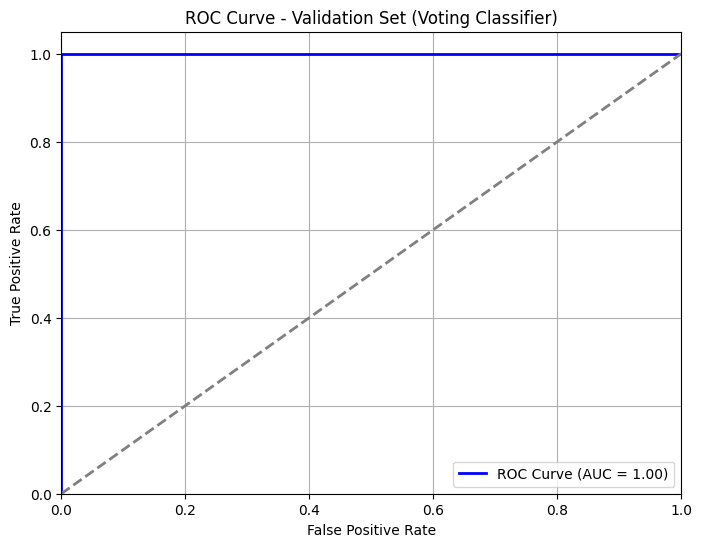

Validation AUC for Voting Classifier: 1.00


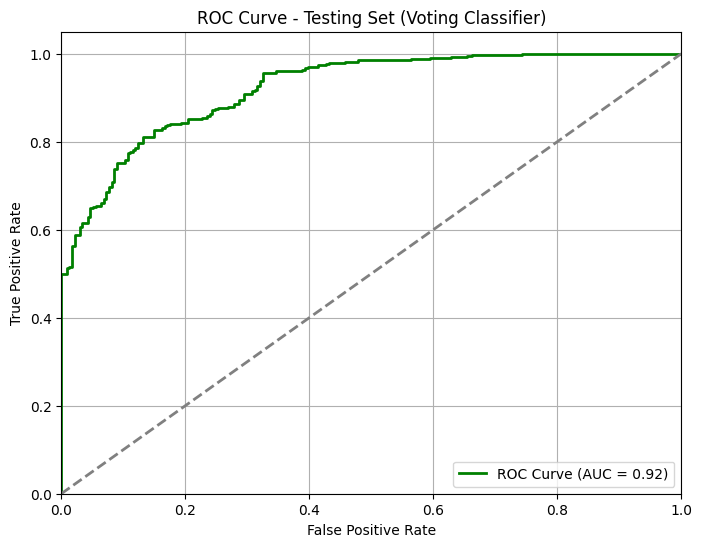

Testing AUC for Voting Classifier: 0.92


In [162]:
# Predict probabilities for the validation set
y_val_probs_voting = voting_model.predict_proba(X_val)[:, 1]  # Probabilities for the positive class

# Compute the ROC curve and AUC for the validation set
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_val, y_val_probs_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)

# Plot the ROC curve for the validation set
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set (Voting Classifier)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print AUC value for validation set
print(f"Validation AUC for Voting Classifier: {roc_auc_voting:.2f}")

# Evaluate on the testing set
y_test_probs_voting = voting_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr_test_voting, tpr_test_voting, thresholds_test_voting = roc_curve(y_test, y_test_probs_voting)
roc_auc_test_voting = auc(fpr_test_voting, tpr_test_voting)

# Plot the ROC curve for the testing set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_voting, tpr_test_voting, color='green', lw=2, label=f'ROC Curve (AUC = {roc_auc_test_voting:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Testing Set (Voting Classifier)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print AUC value for testing set
print(f"Testing AUC for Voting Classifier: {roc_auc_test_voting:.2f}")

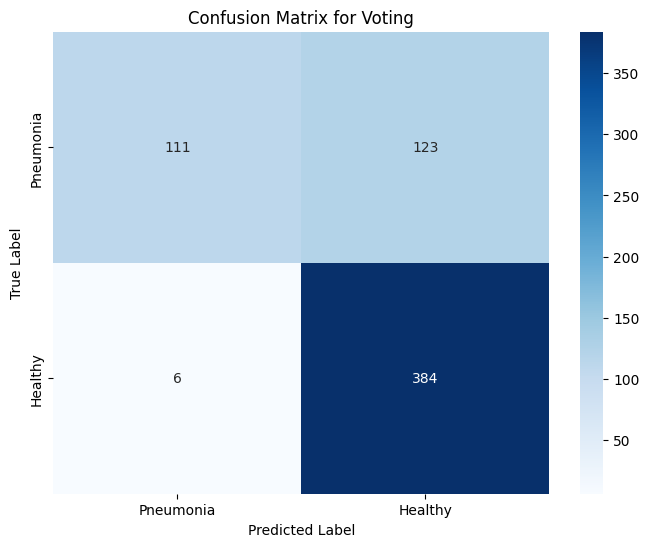

In [163]:
# Generate the confusion matrix
cm_voting = confusion_matrix(y_test, y_pred_voting)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_voting, annot=True, fmt="d", cmap="Blues", xticklabels=["Pneumonia", "Healthy"], yticklabels=["Pneumonia", "Healthy"])
plt.title("Confusion Matrix for Voting")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

                     Model  Accuracy  Precision    Recall  F1-Score
0      SVM (Linear Kernel)  0.759615   0.729885  0.976923  0.835526
1  SVM (Polynomial Kernel)  0.759615   0.731660  0.971795  0.834802
2         SVM (RBF Kernel)  0.772436   0.739382  0.982051  0.843612
3            Decision Tree  0.753205   0.751064  0.905128  0.820930
4            Random Forest  0.857372   0.832230  0.966667  0.894425
5       Bagging Classifier  0.814103   0.795259  0.946154  0.864169
6        Voting Classifier  0.793269   0.757396  0.984615  0.856187


<Figure size 1200x800 with 0 Axes>

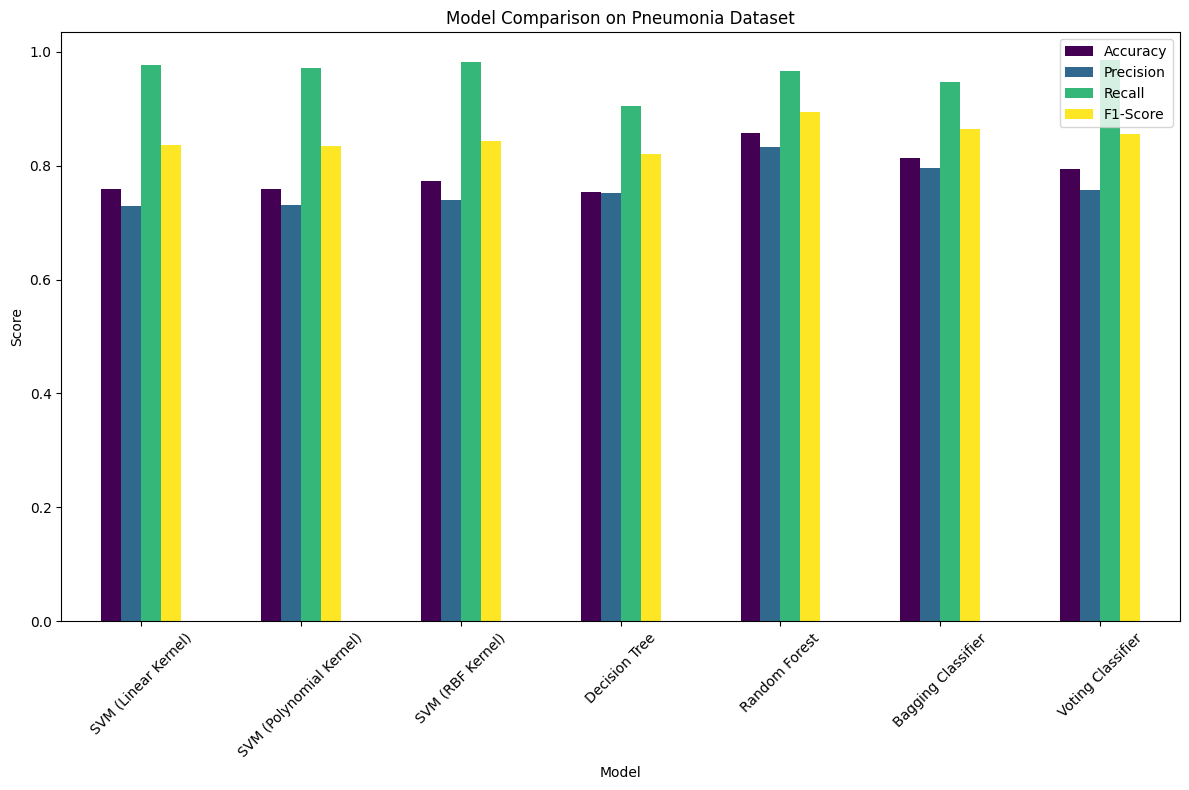

In [164]:
# Assuming y_test and predictions for each model (y_pred_* variables) are available

# Calculate performance metrics for each model
def evaluate_model(name, y_true, y_pred):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='binary'),
        "Recall": recall_score(y_true, y_pred, average='binary'),
        "F1-Score": f1_score(y_true, y_pred, average='binary')
    }

# Collect metrics for all models
results = []

# Add metrics for each model
results.append(evaluate_model("SVM (Linear Kernel)", y_test, y_test_pred_linear))
results.append(evaluate_model("SVM (Polynomial Kernel)", y_test, y_test_pred_poly))
results.append(evaluate_model("SVM (RBF Kernel)", y_test, y_test_pred_rbf))
results.append(evaluate_model("Decision Tree", y_test, y_test_pred_Decission_tree))
results.append(evaluate_model("Random Forest", y_test, y_test_pred_rf))
results.append(evaluate_model("Bagging Classifier", y_test, y_test_pred_Bg))
results.append(evaluate_model("Voting Classifier", y_test, y_pred_voting))
#results.append(evaluate_model("AdaBoost", y_test, y_test_pred_adaboost))

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(results)

# Display the DataFrame
print(comparison_df)

# Plot the metrics for better visualization
plt.figure(figsize=(12, 8))
comparison_df.set_index("Model").plot(kind="bar", figsize=(12, 8), colormap="viridis")
plt.title("Model Comparison on Pneumonia Dataset")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


                     Model  Accuracy  Precision    Recall  F1-Score
0      SVM (Linear Kernel)  0.759615   0.729885  0.976923  0.835526
1  SVM (Polynomial Kernel)  0.759615   0.731660  0.971795  0.834802
2         SVM (RBF Kernel)  0.772436   0.739382  0.982051  0.843612
3            Decision Tree  0.753205   0.751064  0.905128  0.820930
4            Random Forest  0.857372   0.832230  0.966667  0.894425
5       Bagging Classifier  0.814103   0.795259  0.946154  0.864169
6        Voting Classifier  0.793269   0.757396  0.984615  0.856187


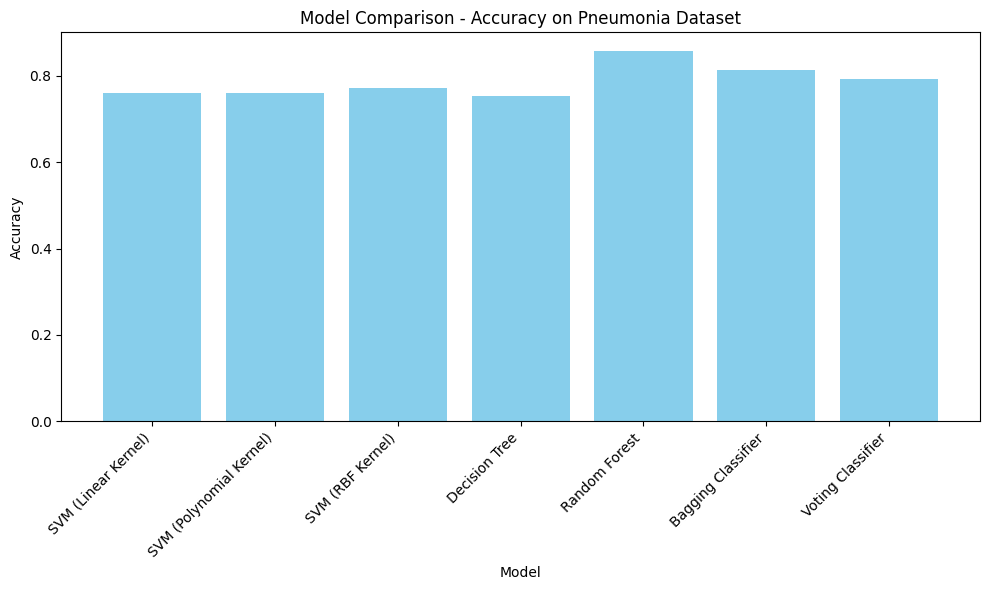

In [169]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test and predictions for each model (y_pred_* variables) are available

# Calculate performance metrics for each model
def evaluate_model(name, y_true, y_pred):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='binary'),
        "Recall": recall_score(y_true, y_pred, average='binary'),
        "F1-Score": f1_score(y_true, y_pred, average='binary')
    }

# Collect metrics for all models
results = []

# Add metrics for each model
results.append(evaluate_model("SVM (Linear Kernel)", y_test, y_test_pred_linear))
results.append(evaluate_model("SVM (Polynomial Kernel)", y_test, y_test_pred_poly))
results.append(evaluate_model("SVM (RBF Kernel)", y_test, y_test_pred_rbf))
results.append(evaluate_model("Decision Tree", y_test, y_test_pred_Decission_tree))
results.append(evaluate_model("Random Forest", y_test, y_test_pred_rf))
results.append(evaluate_model("Bagging Classifier", y_test, y_test_pred_Bg))
results.append(evaluate_model("Voting Classifier", y_test, y_pred_voting))
#results.append(evaluate_model("AdaBoost", y_test, y_test_pred_adaboost))

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(results)

# Display the DataFrame
print(comparison_df)

# Plot the accuracy for each model
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Model'], comparison_df['Accuracy'], color='skyblue')
plt.title("Model Comparison - Accuracy on Pneumonia Dataset")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


                     Model  Accuracy  Precision    Recall  F1-Score
0      SVM (Linear Kernel)  0.759615   0.729885  0.976923  0.835526
1  SVM (Polynomial Kernel)  0.759615   0.731660  0.971795  0.834802
2         SVM (RBF Kernel)  0.772436   0.739382  0.982051  0.843612
3            Decision Tree  0.753205   0.751064  0.905128  0.820930
4            Random Forest  0.857372   0.832230  0.966667  0.894425
5       Bagging Classifier  0.814103   0.795259  0.946154  0.864169
6        Voting Classifier  0.793269   0.757396  0.984615  0.856187


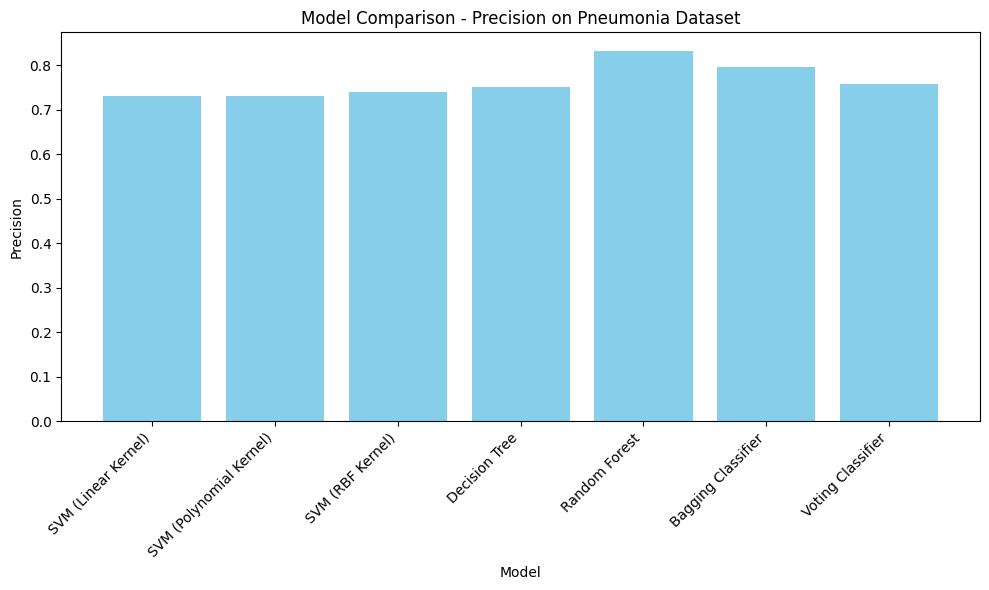

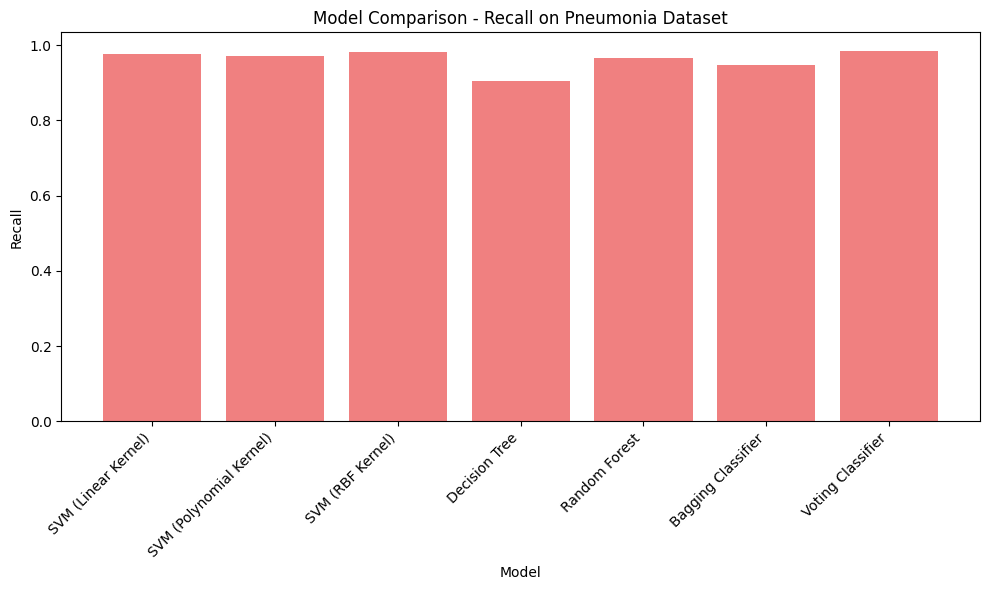

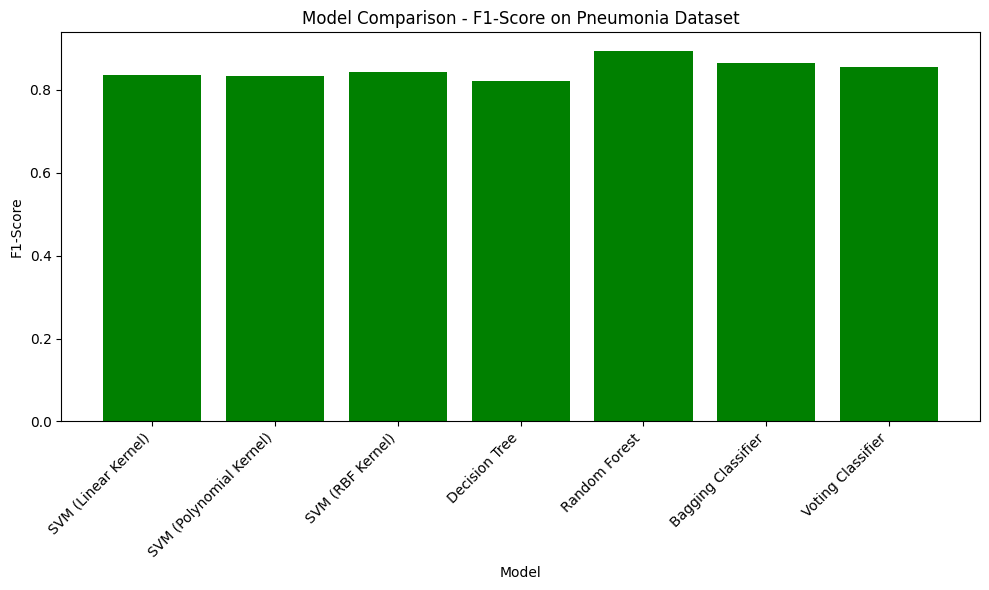

In [171]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test and predictions for each model (y_pred_* variables) are available

# Calculate performance metrics for each model
def evaluate_model(name, y_true, y_pred):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='binary'),
        "Recall": recall_score(y_true, y_pred, average='binary'),
        "F1-Score": f1_score(y_true, y_pred, average='binary')
    }

# Collect metrics for all models
results = []

# Add metrics for each model
results.append(evaluate_model("SVM (Linear Kernel)", y_test, y_test_pred_linear))
results.append(evaluate_model("SVM (Polynomial Kernel)", y_test, y_test_pred_poly))
results.append(evaluate_model("SVM (RBF Kernel)", y_test, y_test_pred_rbf))
results.append(evaluate_model("Decision Tree", y_test, y_test_pred_Decission_tree))
results.append(evaluate_model("Random Forest", y_test, y_test_pred_rf))
results.append(evaluate_model("Bagging Classifier", y_test, y_test_pred_Bg))
results.append(evaluate_model("Voting Classifier", y_test, y_pred_voting))
#results.append(evaluate_model("AdaBoost", y_test, y_test_pred_adaboost))

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(results)

# Display the DataFrame
print(comparison_df)

# Plot the precision for each model
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Model'], comparison_df['Precision'], color='skyblue')
plt.title("Model Comparison - Precision on Pneumonia Dataset")
plt.xlabel("Model")
plt.ylabel("Precision")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the recall for each model
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Model'], comparison_df['Recall'], color='lightcoral')
plt.title("Model Comparison - Recall on Pneumonia Dataset")
plt.xlabel("Model")
plt.ylabel("Recall")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the F1-Score for each model
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Model'], comparison_df['F1-Score'], color='green')
plt.title("Model Comparison - F1-Score on Pneumonia Dataset")
plt.xlabel("Model")
plt.ylabel("F1-Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
